# Plot of 1000 Individual Risk Battle Rounds
---
This program simulates 1000 different battle rounds for the game Risk and plots the results.

## Rules of Risk
- This game can be played with up to 5 players.
- To start, each player roles a die and the player with the highest number can place their first army on any of the territories. Then, starting left of the first player, each player places an amy on unclaimed territory until all are occupied.
- Starting from the first player, each player can now decide to attack neighbouring territories based on certain rules. If the player chooses not to attack, they pass the dice to the player on their left.
- If the player chooses to attack there are rules to this battle round.
- The attacking player can use up to three dice depending on how many armies occupy their own territory and the defender can choose up the two dice. For the purpose of plotting we will assume that the attacker chooses 3 dice and the defender 2 dice each time.
- The attacker and defender roll their die at the same time. The lowest of the three dice by the attacker is not counted.
- If each of the attacker's dice are higher than the defender's dice the defender will lose an army per die. So if the attacker rolls a 6,6,1 and the defender 4,3 for example, the defender loses two armies and if the defender rolls higher dice than the attacker then they lose two armies. If only one of the attacker's die is higher then the defender losses one army and vice versa but if the defender and attacker roll a die or dice of the same value (i.e. when comparing the highest and second highest dice of the defender and attcker and both the highest and/or second highest are the same), then the attacker loses an army or two armies.
- The game is won when one player has an army on every territory.

## Main Things to Highlight for Programme
---
- 1000 individual battle rounds
- Attacker can roll three numbers from values 1-6 inclusive
- Defender can roll two number from values 1-6 inclusive
- Lowest number of three is dicarded
- If die 1 of attacker is greater than die 1 of defender, defender loses 1 army, if lower then attacker loses an army
- If die 2 of attacker is greater than die 2 of defender, defender loses another army, if lower then attacker loses another army
- If die 1 of attacker is equal to die 1 of defender, attacker loses 1 army
- If die 2 of attacker is equal to die 2 of defender, attacker loses another army
- There are 216 possible combinations when rolling 3 dice (6^3), and 36 possible combonations when rolling 2 dice (6^2).

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
options = [(x, y) for x in range(1, 4) for y in range(1, 3)]

print(options)

[(1, 1), (1, 2), (2, 1), (2, 2), (3, 1), (3, 2)]


In [3]:
# Importing named tuple so that the tuples are easier to diferentiate
from typing import NamedTuple

class Attack(NamedTuple):
    n_attackers: int
    n_defenders: int

options = [
    Attack(x, y) for x in range(1, 4) for y in range(1, 3)
]

print(options)

[Attack(n_attackers=1, n_defenders=1), Attack(n_attackers=1, n_defenders=2), Attack(n_attackers=2, n_defenders=1), Attack(n_attackers=2, n_defenders=2), Attack(n_attackers=3, n_defenders=1), Attack(n_attackers=3, n_defenders=2)]


In [4]:

class Attack(NamedTuple):
    n_attackers: int
    n_defenders: int

# Limiting the range to (3,4) and (2,3) as we just want the possible results for if three attacker and two defender dice were rolled
options = [
    Attack(x, y) for x in range (3, 4) for y in range (2, 3)
]
# The sort() command sorts the numbers in ascending order and the flip() command changes it into descending order
for option in options:
    print(option)

    attack = np.random.randint(1, 7, option.n_attackers)
    attack.sort()
    attack = np.flip(attack)
    print(attack)

    defence = np.random.randint(1, 7, option.n_defenders)
    defence.sort()
    defence = np.flip(defence)
    print(defence)

Attack(n_attackers=3, n_defenders=2)
[3 2 1]
[5 2]


In [5]:
attack.ndim

1

In [6]:
# In order to simulate 1000 battle rounds, the array should be changed from a 1D array to a 2D array. 
# This is done by adding n_repeats as a new variable and setting it to the number of battle rounds you want to simulate

n_repeats = 5

class Attack(NamedTuple):
    n_attackers: int
    n_defenders: int

options = [
    Attack(x, y) for x in range (3, 4) for y in range (2, 3)
]

for option in options:
    print(option)

    attack = np.random.randint(1, 7, size=(n_repeats, option.n_attackers))
    attack.sort()
    attack = np.flip(attack)
    print(attack)

    defence = np.random.randint(1, 7, size=(n_repeats, option.n_defenders))
    defence.sort()
    defence = np.flip(defence)
    print(defence)

Attack(n_attackers=3, n_defenders=2)
[[5 1 1]
 [4 3 1]
 [5 5 4]
 [6 5 1]
 [4 2 1]]
[[4 4]
 [4 2]
 [5 2]
 [6 5]
 [3 1]]


In [7]:
# The lowest of the attackers dice rolls can be discarded since it not to be used as per the game rules. 
# This can be done by trimming the arrays and then using the '>' operator to only compare the two highest dice rolls in all the arrays.

n_repeats = 5

class Attack(NamedTuple):
    n_attackers: int
    n_defenders: int

options = [
    Attack(x, y) for x in range (3, 4) for y in range (2, 3)
]

for option in options:
    print(option)

    attack = np.random.randint(1, 7, size=(n_repeats, option.n_attackers))
    attack.sort()
    attack = np.flip(attack)
    print(attack)

    defence = np.random.randint(1, 7, size=(n_repeats, option.n_defenders))
    defence.sort()
    defence = np.flip(defence)
    print(defence)

# The index min value is set to 1 so that it reads the second value of the array as the last value and disregards any number after that.
# All the rows in the arrays are kept but the columns are truncated using the expression `attack[:, :min_length] and defence[:, :min_length]`
# The first colon represents all of the rows and the colon in front of the min_length represents all the columns up until the min_legth that was established which is the second column value
min_length = min(attack.shape[1], defence.shape[1])
result = attack[:, :min_length] > defence[:, :min_length]
    
print(result)
print()

Attack(n_attackers=3, n_defenders=2)
[[5 4 4]
 [6 3 1]
 [4 2 1]
 [6 4 4]
 [4 2 2]]
[[6 6]
 [2 1]
 [6 2]
 [5 2]
 [4 2]]
[[False False]
 [ True  True]
 [False False]
 [ True  True]
 [False False]]



The previous code gives True or False as results of each battle. For example, if the attacker got [3 2 1] and the defender got [6 1] the result would be [False True]. The defender beat the attacker with the first dice roll - False, but the attacker beat the defender with the second dice roll - True. If both the attackers dice rolls were higher than the defender, the result would be [True True] and if the defender beat the attacker in both dice rolls the result would be [False False].

In [8]:
n_repeats = 5

class Attack(NamedTuple):
    n_attackers: int
    n_defenders: int

options = [
    Attack(x, y) for x in range (3, 4) for y in range (2, 3)
]

for option in options:
    print(option)

    attack = np.random.randint(1, 7, size=(n_repeats, option.n_attackers))
    attack.sort()
    attack = np.flip(attack)
    print(attack)

    defence = np.random.randint(1, 7, size=(n_repeats, option.n_defenders))
    defence.sort()
    defence = np.flip(defence)
    print(defence)

min_length = min(attack.shape[1], defence.shape[1])
result = attack[:, :min_length] > defence[:, :min_length]
  
print(result)
print()

Attack(n_attackers=3, n_defenders=2)
[[5 4 2]
 [5 1 1]
 [6 1 1]
 [5 4 4]
 [6 6 2]]
[[6 3]
 [6 5]
 [5 2]
 [5 3]
 [3 2]]
[[False  True]
 [False False]
 [ True False]
 [False  True]
 [ True  True]]



In [9]:
# Import pandas to create a dataframe
import pandas as pd

In [10]:
n_repeats = 5

class Attack(NamedTuple):
    n_attackers: int
    n_defenders: int

options = [
    Attack(x, y) for x in range (3, 4) for y in range (2, 3)
]

for option in options:
    print(option)

    attack = np.random.randint(1, 7, size=(n_repeats, option.n_attackers))
    attack.sort()
    attack = np.flip(attack)
    print(attack)

    defence = np.random.randint(1, 7, size=(n_repeats, option.n_defenders))
    defence.sort()
    defence = np.flip(defence)
    print(defence)

min_length = min(attack.shape[1], defence.shape[1])
result = attack[:, :min_length] > defence[:, :min_length]

# Can convert the True/False results into a dataframe using pd.DataFrame()  
print(result)
df = pd.DataFrame(result)
print(df)
print()

Attack(n_attackers=3, n_defenders=2)
[[6 6 6]
 [5 2 1]
 [3 2 1]
 [5 3 3]
 [4 3 2]]
[[2 1]
 [6 1]
 [2 1]
 [5 4]
 [5 1]]
[[ True  True]
 [False  True]
 [ True  True]
 [False False]
 [False  True]]
       0      1
0   True   True
1  False   True
2   True   True
3  False  False
4  False   True



In [11]:
n_repeats = 1000

class Attack(NamedTuple):
    n_attackers: int
    n_defenders: int

options = [
    Attack(x, y) for x in range (3, 4) for y in range (2, 3)
]

for option in options:
    print(option)

    attack = np.random.randint(1, 7, size=(n_repeats, option.n_attackers))
    attack.sort()
    attack = np.flip(attack)
    #print(attack)

    defence = np.random.randint(1, 7, size=(n_repeats, option.n_defenders))
    defence.sort()
    defence = np.flip(defence)
    #print(defence)

min_length = min(attack.shape[1], defence.shape[1])
result = attack[:, :min_length] > defence[:, :min_length]

# Can convert the True/False results into a dataframe using pd.DataFrame()  
#print(result)
df = pd.DataFrame(result)
print(df)
print()

Attack(n_attackers=3, n_defenders=2)
         0      1
0    False  False
1    False  False
2     True   True
3    False  False
4    False  False
..     ...    ...
995  False  False
996  False  False
997   True   True
998  False  False
999   True  False

[1000 rows x 2 columns]



In [12]:
df.to_csv('risk.csv')

In [13]:
df = pd.read_csv('risk.csv', header=None, index_col=0)

df

,1,2
0,,
NaN,0,1
0.0,False,False
1.0,False,False
2.0,True,True
3.0,False,False
...,...,...
995.0,False,False
996.0,False,False
997.0,True,True


In [16]:
# Change all column names
df.columns = ['Dice1', 'Dice2']
print(df)


       Dice1  Dice2
0                  
NaN        0      1
0.0    False  False
1.0    False  False
2.0     True   True
3.0    False  False
...      ...    ...
995.0  False  False
996.0  False  False
997.0   True   True
998.0  False  False
999.0   True  False

[1001 rows x 2 columns]


In [21]:
#np.sum() calculates the number of 'True' results
print(np.sum(result))

1066


In [22]:
attacker_wins = np.sum(result)
print(attacker_wins)

1066


In [23]:
defender_wins = (n_repeats * 2) - np.sum(result) 
print(defender_wins)

934


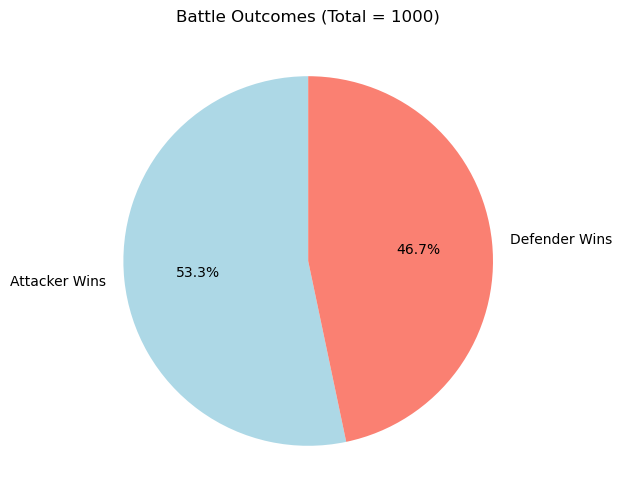

In [26]:
import matplotlib.pyplot as plt

# Data for the pie chart
counts = [1066, 934]  # Attacker wins, Defender wins
labels = ['Attacker Wins', 'Defender Wins']
colors = ['lightblue', 'salmon']

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Battle Outcomes (Total = 1000)') # Total is 2000 as you are comparing 2 pairs of dice every round
plt.show()


## References
---
1. How to play Risk: https://www.hasbro.com/common/instruct/risk.pdf
2. Battle Outcome Analysis: https://www.c4i.gr/xgeorgio/docs/RISK-board-game%20_rev-3.pdf
3. Battle simulation code: https://thepythoncodingbook.com/2022/12/30/using-python-numpy-to-improve-board-game-strategy-risk/
4. Numpy documentation: https://numpy.org/doc/2.1/user/absolute_beginners.html#how-to-save-and-load-numpy-objects